In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

plt.rcParams.update({"font.size": 13})

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, ``x``,  of `len(N)` (with $N = O(100)$) with a normally distributed variable, with a given mean and standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper $y$ axis label
   * set a proper value for the $y$ axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of $x$, create a gaussian with the mean corresponding to the element value and `std` as a parameter that can be tuned. The `std` default value should be:
    ```python
    1.06 * x.std() * x.size**(-1 / 5)
    ```
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


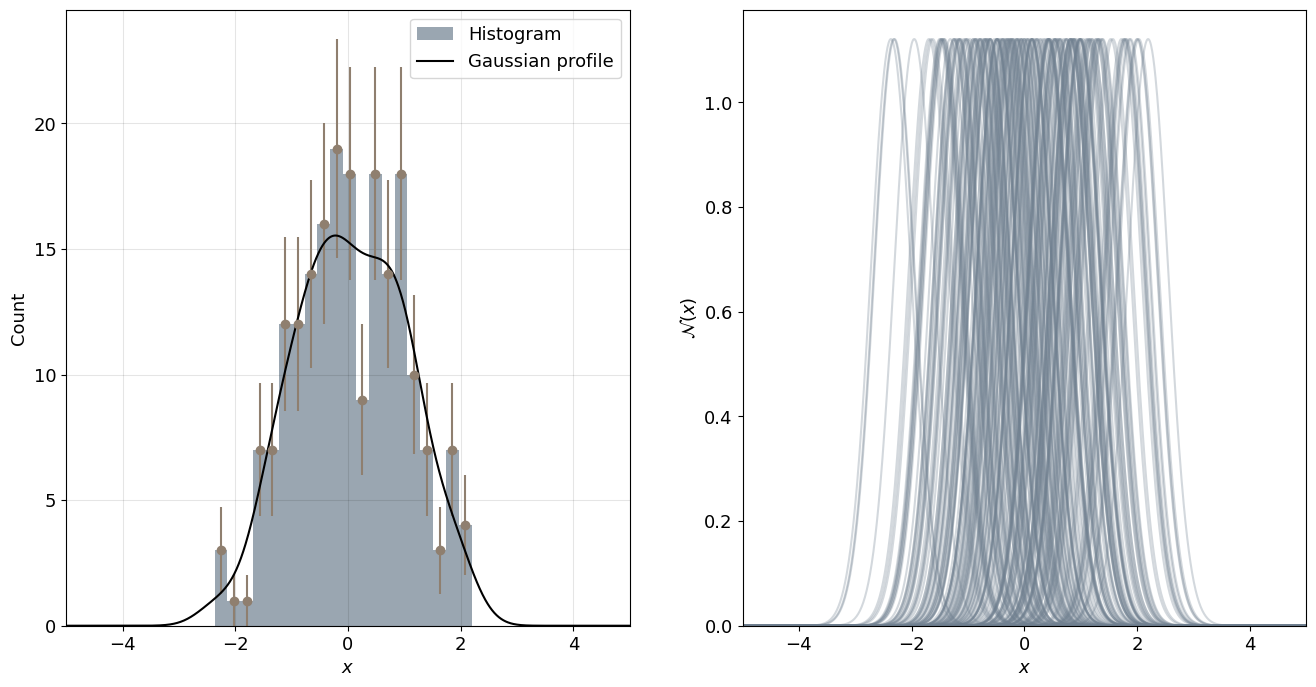

In [22]:
N = 200
mu = 0
sigma = 1

# generate N normally distributed numbers
data = np.random.normal(mu, sigma, N)
# set standard deviation for the gaussians later on
std = 1.06 * data.std() * N**(-1 / 5)

domain = np.linspace(-5 * sigma, 5 * sigma, 1000)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# histogram plot (bins variable is needed later)
counts, bins, _ = ax1.hist(data, 20, facecolor="#708090", alpha=0.7,
                           label="Histogram")
midpoints = 0.5 * (bins[:-1] + bins[1:])
ax1.errorbar(midpoints, counts, yerr=np.sqrt(counts), c="#8f7f6f", fmt='o')
ax1.locator_params(integer=True)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel("Count")
ax1.set_xlim((domain[0], domain[-1]))
ax1.grid(color="k", alpha=0.1)

# gaussians plot
gaussians = np.array([sp.stats.norm.pdf(domain, mean, std) for mean in data])
for gauss_i in gaussians:
    ax2.plot(domain, gauss_i, c='#708090', alpha=0.3)
ax2.set_xlim((domain[0], domain[-1]))
ax2.set_ylim(0)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$\mathcal{N}(x)$")

# sum the gaussians and do the integrals
gauss_sum = np.sum(gaussians, axis=0)
hist_integral = sp.integrate.trapz(counts, midpoints)
gauss_integral = sp.integrate.trapz(gauss_sum, domain)
# renormalize
gauss_sum *= hist_integral / gauss_integral

ax1.plot(domain, gauss_sum, c='k', label="Gaussian profile")
ax1.legend()

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [2]:
def dataset_2d(num_1, mean_1, cov_1, num_2, mean_2, cov_2):
    data_1 = np.random.multivariate_normal(mean_1, cov_1, num_1)
    data_1 = pd.DataFrame(
        {
            "x": data_1[:, 0],
            "y": data_1[:, 1],
            "Category": pd.Categorical(['A'] * num_1)
        }
    )

    data_2 = np.random.multivariate_normal(mean_2, cov_2, num_2)
    data_2 = pd.DataFrame(
        {
            "x": data_2[:, 0],
            "y": data_2[:, 1],
            "Category": pd.Categorical(['B'] * num_2)
        }
    )

    return pd.concat([data_1, data_2])

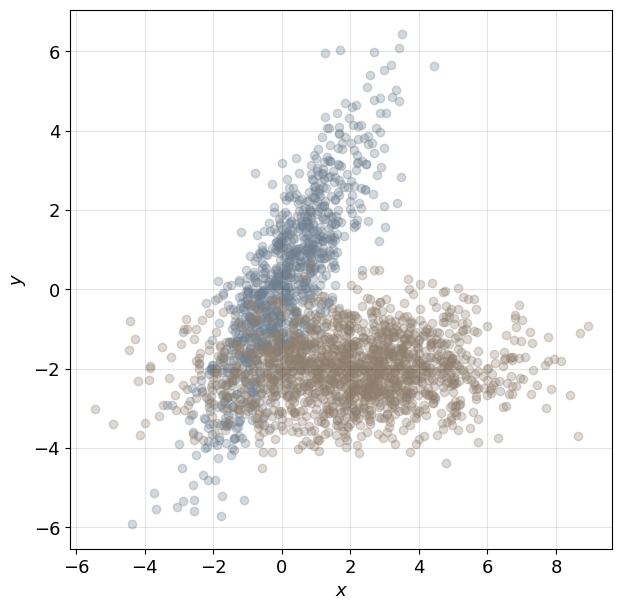

In [3]:
df = dataset_2d(1000, [0, 0], [[1.5, 2], [2, 4]],
                1500, [2, -2], [[5, 0.2], [0.2, 0.7]])

plt.figure(figsize=(7, 7))
for cat, col in {'A': "#708090", 'B': "#8f7f6f"}.items():
    pts = df[df["Category"] == cat]
    plt.scatter(x=pts["x"], y=pts["y"], label=cat, c=col, alpha=0.3)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.grid(c='k', alpha=0.1)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

Slope: 0.00326
Intercept: -0.15433
R-value: 0.04340


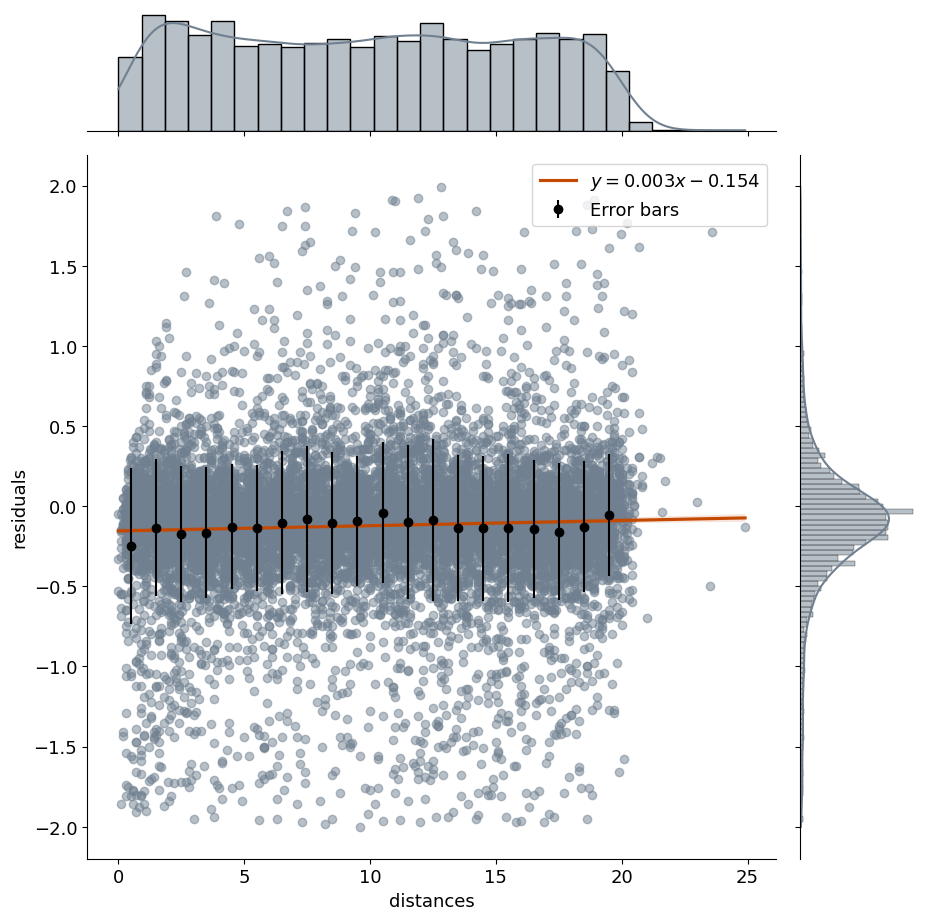

In [23]:
df = pd.DataFrame(np.load("residuals_261.npy", allow_pickle=True).item())
df = df[np.abs(df["residuals"]) < 2]

# regression by scipy
reg = sp.stats.linregress(x=df["distances"], y=df["residuals"])
print(f"Slope: {reg.slope:.5f}")
print(f"Intercept: {reg.intercept:.5f}")
print(f"R-value: {reg.rvalue:.5f}")

if reg.intercept < 0:
    # don't put plus sign if intercept is negative
    fit_label = rf"$y = {reg.slope:.3f}x {reg.intercept:.3f}$"
else:
    fit_label = rf"$y = {reg.slope:.3f}x + {reg.intercept:.3f}$"
    
# binning
n_bins = 20
bins = np.linspace(0, 20, n_bins + 1)
x = 0.5 * (bins[:-1] + bins[1:])
y = np.zeros(n_bins)
erry = np.zeros(n_bins)

for i in range(n_bins):
    resid_slice = df[(df["distances"] >= bins[i])
                     & (df["distances"] < bins[i + 1])]["residuals"]
    y[i] = np.mean(resid_slice)
    erry[i] = resid_slice.std()

jp = sns.jointplot(data=df, x="distances", y="residuals",
                   kind='reg',
                   color="#708090",
                   scatter_kws={"alpha": 0.5},
                   line_kws={"color": "#c44900", "label": fit_label})
jp.ax_joint.errorbar(x, y, yerr=erry, fmt='ko', label="Error bars")
jp.ax_joint.legend()
jp.fig.set_figwidth(10)
jp.fig.set_figheight(10)